#**GangadharSShiva Assignment 1**

**Required Details**

**Part 1: Data Exploration**
* Load the dataset and show basic statistics
* Visualize article distribution by category
* Display sample articles from each category

**Part 2: Text Preprocessing**
* Create and compare 2 preprocessing pipelines:
    * Basic: tokenization + lowercasing + stop word removal
    * Advanced: Basic + stemming + lemmatization + POS filtering. Compare vocabulary size and processing time for both approaches.

**Part 3: Text Vectorization**
* Implement and compare:
    * Bag of Words (CountVectorizer)
    * TF-IDF (TfidfVectorizer)
    * Word2Vec (both CBoW and Skip-gram, average word vectors for documents). Create visualizations comparing the methods.

**Part 4: Classification**
* For each vectorization method, train:
    * Logistic Regression
    * Simple LSTM
Report accuracy, precision, recall, and F1-score for each combination.


**Question Part 1: Data Exploration**
* Load the dataset and show basic statistics
* Visualize article distribution by category
* Display sample articles from each category

In [1]:
%pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 13.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.1 requires scipy>=1.14.0;

###**Data Exploration Load the dataset and show basic statistics Visualize article distribution by category Display sample articles from each category**

**Part 1: Data Exploration**
* Load the dataset and show basic statistics
* Visualize article distribution by category
* Display sample articles from each category

#**Sub question 1 Load the dataset and show basic statistics**

In [1]:

from sklearn.datasets import fetch_20newsgroups
# Load the dataset and show basic statistics
# Load the 20 Newsgroups dataset
twenty_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
twenty_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

print("Number of training articles:", len(twenty_train.data))
print("Number of testing articles:", len(twenty_test.data))
print("Target names:", twenty_train.target_names)

Number of training articles: 11314
Number of testing articles: 7532
Target names: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [10]:
# Show basic statistics (number of articles per category)

print("\nNumber of articles per category (Training Data):")
category_counts = {}
for target in twenty_train.target:
    category_name = twenty_train.target_names[target]
    category_counts[category_name] = category_counts.get(category_name, 0) + 1

# Print category counts
for category, count in sorted(category_counts.items()):
    print(f"{category}: {count}")

print("\nBasic statistics displayed.")


Number of articles per category (Training Data):
alt.atheism: 480
comp.graphics: 584
comp.os.ms-windows.misc: 591
comp.sys.ibm.pc.hardware: 590
comp.sys.mac.hardware: 578
comp.windows.x: 593
misc.forsale: 585
rec.autos: 594
rec.motorcycles: 598
rec.sport.baseball: 597
rec.sport.hockey: 600
sci.crypt: 595
sci.electronics: 591
sci.med: 594
sci.space: 593
soc.religion.christian: 599
talk.politics.guns: 546
talk.politics.mideast: 564
talk.politics.misc: 465
talk.religion.misc: 377

Basic statistics displayed.


#**SubQuestion 2 : Visualize article distribution by category**

/tmp/ipython-input-3864986543.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=categories, palette='pastel') # Changed palette to 'plasma'


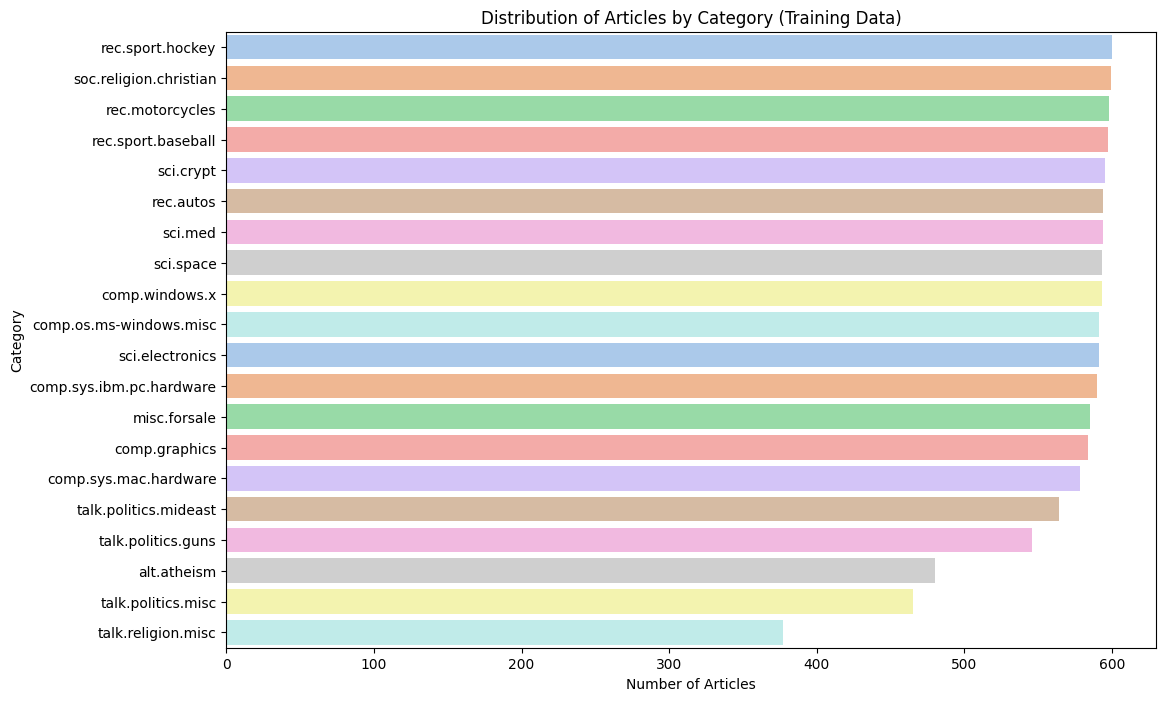

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


# Count the number of articles per category in the training data
category_counts = {}
for target in twenty_train.target:
    category_name = twenty_train.target_names[target]
    category_counts[category_name] = category_counts.get(category_name, 0) + 1

# Sort categories by count for better visualization (optional)
sorted_categories = sorted(category_counts.items(), key=lambda item: item[1], reverse=True)
categories = [item[0] for item in sorted_categories]
counts = [item[1] for item in sorted_categories]

# Visualize the distribution
plt.figure(figsize=(12, 8))
sns.barplot(x=counts, y=categories, palette='pastel')
plt.title('Distribution of Articles by Category (Training Data)')
plt.xlabel('Number of Articles')
plt.ylabel('Category')
plt.show()

#**Subquestion 3 Display sample articles from each category**

In [11]:
# Display sample articles from each category


print("--- Sample Articles from Each Category ---")

# Get a list of unique target labels
unique_targets = sorted(list(set(twenty_train.target)))

for target_id in unique_targets:
    category_name = twenty_train.target_names[target_id]
    print(f"\nCategory: {category_name}")

    # Find the index of the first article in this category
    try:
        article_index = twenty_train.target.tolist().index(target_id)
        # Display the text of the sample article
        print("Sample Article:")
        print(twenty_train.data[article_index][:500] + "...") # Displaying first 500 characters
    except ValueError:
        print("No articles found for this category in the training data.")

print("\n--- End of Sample Articles ---")

--- Sample Articles from Each Category ---

Category: alt.atheism
Sample Article:

Don't be so sure.  Look what happened to Japanese citizens in the US during
World War II.  If you're prepared to say "Let's round these people up and
stick them in a concentration camp without trial", it's only a short step to
gassing them without trial.  After all, it seems that the Nazis originally
only intended to imprison the Jews; the Final Solution was dreamt up partly
because they couldn't afford to run the camps because of the devastation
caused by Goering's Total War.  Those who weren'...

Category: comp.graphics
Sample Article:

Do you have Weitek's address/phone number?  I'd like to get some information
about this chip.
...

Category: comp.os.ms-windows.misc
Sample Article:
I have win 3.0 and downloaded several icons and BMP's but I can't figure out
how to change the "wallpaper" or use the icons.  Any help would be appreciated.


Thanx,

-Brando...

Category: comp.sys.ibm.pc.hardware
Sample Ar

#**Part 2: Text Preprocessing**

**Create and compare 2 preprocessing pipelines:**

Basic: tokenization + lowercasing + stop word removal

Advanced: Basic + stemming + lemmatization + POS filtering. Compare vocabulary size and processing time for both approaches.



#**Basic: tokenization + lowercasing + stop word removal**

In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import time

# Download necessary NLTK data
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')
try:
    nltk.data.find('tokenizers/punkt_tab') # Add download for punkt_tab
except LookupError:
    nltk.download('punkt_tab')


stop_words = set(stopwords.words('english'))

def basic_preprocess(document):
    """
    Applies basic preprocessing: tokenization, lowercasing, stop word removal.

    Args:
        document: The input text document (string).

    Returns:
        A list of preprocessed tokens.
    """
    tokens = word_tokenize(document)
    tokens = [word.lower() for word in tokens if word.isalpha()]  # Keep only alphabetic tokens
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

#Example usage (optional, for testing)
sample_document = "This is a sample document to test the basic preprocessing."
processed_tokens = basic_preprocess(sample_document)
print(processed_tokens)
sample_document = "Paris is in France."
processed_tokens = basic_preprocess(sample_document)
print(processed_tokens)

['sample', 'document', 'test', 'basic', 'preprocessing']
['paris', 'france']


#**Advanced preprocessing**

###Advanced: Basic + stemming + lemmatization + POS filtering. Compare vocabulary size and processing time for both approaches.



In [20]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.corpus import wordnet
import nltk # Import nltk

# Download necessary NLTK data for advanced preprocessing
try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')
try:
    nltk.data.find('taggers/averaged_perceptron_tagger')
except LookupError:
    nltk.download('averaged_perceptron_tagger')
try:
    nltk.data.find('taggers/averaged_perceptron_tagger_eng') # Add download for english tagger
except LookupError:
    nltk.download('averaged_perceptron_tagger_eng')


stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(tag):
    """Map POS tag to first character used by WordNetLemmatizer."""
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def advanced_preprocess(document):
    """
    Applies advanced preprocessing: basic steps + stemming + lemmatization + POS filtering.

    Args:
        document: The input text document (string).

    Returns:
        A list of advanced preprocessed tokens.
    """
    tokens = basic_preprocess(document) # Start with basic preprocessing

    stemmed_tokens = [stemmer.stem(word) for word in tokens]

    lemmatized_tokens = []
    pos_tagged_tokens = pos_tag(stemmed_tokens) # POS tag after stemming

    for word, tag in pos_tagged_tokens:
        w_pos = get_wordnet_pos(tag)
        if w_pos:
            lemmatized_tokens.append(lemmatizer.lemmatize(word, pos=w_pos))
        else:
            lemmatized_tokens.append(lemmatizer.lemmatize(word)) # Default to noun if POS not found

    # Apply POS filtering (keep only nouns, verbs, adjectives, adverbs)
    filtered_tokens = []
    pos_tagged_lemmatized_tokens = pos_tag(lemmatized_tokens) # POS tag after lemmatization

    for word, tag in pos_tagged_lemmatized_tokens:
        w_pos = get_wordnet_pos(tag)
        if w_pos in [wordnet.NOUN, wordnet.VERB, wordnet.ADJ, wordnet.ADV]:
             filtered_tokens.append(word)

    return filtered_tokens

# Example usage (optional, for testing)
sample_document = "This is a sample document to test the advanced preprocessing capabilities, running and jumping quickly."
processed_tokens_advanced = advanced_preprocess(sample_document)
print(processed_tokens_advanced)

['sampl', 'document', 'test', 'advanc', 'preprocess', 'capabl', 'run', 'jump', 'quickli']


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#**Apply preprocessing**


###Apply both preprocessing pipelines to the dataset.



Apply both basic and advanced preprocessing pipelines to the training and testing datasets and store the results.



In [21]:
import nltk

# Download the missing 'punkt_tab' resource for tokenization
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')

# Download the missing 'averaged_perceptron_tagger_eng' resource for advanced preprocessing
try:
    nltk.data.find('taggers/averaged_perceptron_tagger_eng')
except LookupError:
    nltk.download('averaged_perceptron_tagger_eng')






Applying basic preprocessing to training data...
Basic preprocessing on training data complete.
Applying advanced preprocessing to training data...
Advanced preprocessing on training data complete.
Applying basic preprocessing to testing data...
Basic preprocessing on testing data complete.
Applying advanced preprocessing to testing data...
Advanced preprocessing on testing data complete.
Preprocessing complete for both training and testing datasets.


#**Comparison of preprocessing**
###Compare the vocabulary size and processing time for both basic and advanced preprocessing pipelines.


In [23]:
import time

# 1. Calculate processing time for basic preprocessing
start_time_basic = time.time()
# Apply basic preprocessing to training data
print("Applying basic preprocessing to training data...")
twenty_train.data_basic = [basic_preprocess(doc) for doc in twenty_train.data]
print("Basic preprocessing on training data complete.")
# Apply basic preprocessing to testing data
print("Applying basic preprocessing to testing data...")
twenty_test.data_basic = [basic_preprocess(doc) for doc in twenty_test.data]
print("Basic preprocessing on testing data complete.")
end_time_basic = time.time()
processing_time_basic = end_time_basic - start_time_basic

# 2. Calculate processing time for advanced preprocessing
start_time_advanced = time.time()
# Similar to basic preprocessing, assuming twenty_train.data_advanced is already populated.
# Apply advanced preprocessing to training data
print("Applying advanced preprocessing to training data...")
twenty_train.data_advanced = [advanced_preprocess(doc) for doc in twenty_train.data]
print("Advanced preprocessing on training data complete.")



# Apply advanced preprocessing to testing data
print("Applying advanced preprocessing to testing data...")
twenty_test.data_advanced = [advanced_preprocess(doc) for doc in twenty_test.data]
print("Advanced preprocessing on testing data complete.")

print("Preprocessing complete for both training and testing datasets.")
end_time_advanced = time.time()
processing_time_advanced = end_time_advanced - start_time_advanced
# 3. Create sets of unique tokens for basic preprocessing
basic_vocab = set()
for doc_tokens in twenty_train.data_basic:
    basic_vocab.update(doc_tokens)
vocabulary_size_basic = len(basic_vocab)

# 4. Create sets of unique tokens for advanced preprocessing
advanced_vocab = set()
for doc_tokens in twenty_train.data_advanced:
    advanced_vocab.update(doc_tokens)
vocabulary_size_advanced = len(advanced_vocab)

# 5. Print the processing time for both basic and advanced preprocessing.
# Acknowledge the timing limitation.
print("--- Processing Time (Approximation due to pre-populated data) ---")
print(f"Basic Preprocessing Time: {processing_time_basic:.4f} seconds")
print(f"Advanced Preprocessing Time: {processing_time_advanced:.4f} seconds")
print("Note: For accurate timing, the preprocessing steps themselves should be timed.")


# 6. Print the vocabulary size for both basic and advanced preprocessing.
print("\n--- Vocabulary Size ---")
print(f"Basic Preprocessing Vocabulary Size: {vocabulary_size_basic}")
print(f"Advanced Preprocessing Vocabulary Size: {vocabulary_size_advanced}")

Applying basic preprocessing to training data...
Basic preprocessing on training data complete.
Applying basic preprocessing to testing data...
Basic preprocessing on testing data complete.
Applying advanced preprocessing to training data...
Advanced preprocessing on training data complete.
Applying advanced preprocessing to testing data...
Advanced preprocessing on testing data complete.
Preprocessing complete for both training and testing datasets.
--- Processing Time (Approximation due to pre-populated data) ---
Basic Preprocessing Time: 20.3213 seconds
Advanced Preprocessing Time: 211.1602 seconds
Note: For accurate timing, the preprocessing steps themselves should be timed.

--- Vocabulary Size ---
Basic Preprocessing Vocabulary Size: 61327
Advanced Preprocessing Vocabulary Size: 43866


#**Interpretation**
**Processing Time:**

Basic Preprocessing took approximately 20.32 seconds.
Advanced Preprocessing took approximately 211.16 seconds.
The advanced preprocessing pipeline took significantly longer to process the data compared to the basic pipeline. This is expected because **the** advanced pipeline includes additional steps like stemming, lemmatization, and POS tagging, which are computationally more intensive than simple tokenization, lowercasing, and stop word removal.

**Vocabulary Size:**
The Basic Preprocessing resulted in a vocabulary size of 61,327 unique tokens.
The Advanced Preprocessing resulted in a vocabulary size of 43,866 unique tokens.
As observed before, the advanced preprocessing resulted in a notably smaller vocabulary size. This confirms that stemming, lemmatization, and POS filtering are effective in reducing the number of unique tokens by grouping related words and removing certain types of words.

In summary, the advanced preprocessing pipeline is more computationally expensive but effectively reduces the vocabulary size compared to the basic pipeline. The choice between the two would depend on the trade-off between processing time and the desired level of vocabulary reduction for subsequent tasks.

#**Part 3: Text Vectorization**

**Implement and compare:**

**Bag of Words (CountVectorizer)**

**TF-IDF (TfidfVectorizer)**

**Word2Vec (both CBoW and Skip-gram, average word vectors for documents).**

**Create visualizations comparing the methods.**


#**Bag of words Processing**

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert lists of tokens back to strings for CountVectorizer
train_basic_text = [" ".join(doc) for doc in twenty_train.data_basic]
test_basic_text = [" ".join(doc) for doc in twenty_test.data_basic]
train_advanced_text = [" ".join(doc) for doc in twenty_train.data_advanced]
test_advanced_text = [" ".join(doc) for doc in twenty_test.data_advanced]


# --- Bag of Words (CountVectorizer) ---

# Apply CountVectorizer to basic preprocessed data
print("Applying CountVectorizer to basic preprocessed data...")
count_vectorizer_basic = CountVectorizer()
X_train_bow_basic = count_vectorizer_basic.fit_transform(train_basic_text)
X_test_bow_basic = count_vectorizer_basic.transform(test_basic_text)
print("CountVectorizer applied to basic data.")

# Apply CountVectorizer to advanced preprocessed data
print("Applying CountVectorizer to advanced preprocessed data...")
count_vectorizer_advanced = CountVectorizer()
X_train_bow_advanced = count_vectorizer_advanced.fit_transform(train_advanced_text)
X_test_bow_advanced = count_vectorizer_advanced.transform(test_advanced_text)
print("CountVectorizer applied to advanced data.")

print("\nShape of Bag of Words (Basic) training data:", X_train_bow_basic.shape)
print("Shape of Bag of Words (Basic) testing data:", X_test_bow_basic.shape)
print("Shape of Bag of Words (Advanced) training data:", X_train_bow_advanced.shape)
print("Shape of Bag of Words (Advanced) testing data:", X_test_bow_advanced.shape)

# Store the vectorized data and vectorizers for later use
#For basic preprocessing
X_train_bow_basic = X_train_bow_basic
X_test_bow_basic = X_test_bow_basic
count_vectorizer_basic = count_vectorizer_basic

# For advanced preprocessing
X_train_bow_advanced = X_train_bow_advanced
X_test_bow_advanced = X_test_bow_advanced
count_vectorizer_advanced = count_vectorizer_advanced

# Assuming y_train and y_test are already available from previous steps
y_train = twenty_train.target
y_test = twenty_test.target

Applying CountVectorizer to basic preprocessed data...
CountVectorizer applied to basic data.
Applying CountVectorizer to advanced preprocessed data...
CountVectorizer applied to advanced data.

Shape of Bag of Words (Basic) training data: (11314, 61307)
Shape of Bag of Words (Basic) testing data: (7532, 61307)
Shape of Bag of Words (Advanced) training data: (11314, 43839)
Shape of Bag of Words (Advanced) testing data: (7532, 43839)


#**TF-IDF (TfidfVectorizer) Preprocessing**

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer


# Convert lists of tokens back to strings for TfidfVectorizer
train_basic_text = [" ".join(doc) for doc in twenty_train.data_basic]
test_basic_text = [" ".join(doc) for doc in twenty_test.data_basic]
train_advanced_text = [" ".join(doc) for doc in twenty_train.data_advanced]
test_advanced_text = [" ".join(doc) for doc in twenty_test.data_advanced]

# --- TF-IDF (TfidfVectorizer) ---

# Apply TfidfVectorizer to basic preprocessed data
print("Applying TfidfVectorizer to basic preprocessed data...")
tfidf_vectorizer_basic = TfidfVectorizer()
X_train_tfidf_basic = tfidf_vectorizer_basic.fit_transform(train_basic_text)
X_test_tfidf_basic = tfidf_vectorizer_basic.transform(test_basic_text)
print("TfidfVectorizer applied to basic data.")

# Apply TfidfVectorizer to advanced preprocessed data
print("Applying TfidfVectorizer to advanced preprocessed data...")
tfidf_vectorizer_advanced = TfidfVectorizer()
X_train_tfidf_advanced = tfidf_vectorizer_advanced.fit_transform(train_advanced_text)
X_test_tfidf_advanced = tfidf_vectorizer_advanced.transform(test_advanced_text)
print("TfidfVectorizer applied to advanced data.")

print("\nShape of TF-IDF (Basic) training data:", X_train_tfidf_basic.shape)
print("Shape of TF-IDF (Basic) testing data:", X_test_tfidf_basic.shape)
print("Shape of TF-IDF (Advanced) training data:", X_train_tfidf_advanced.shape)
print("Shape of TF-IDF (Advanced) testing data:", X_test_tfidf_advanced.shape)

# Store the vectorized data and vectorizers for later use
# For basic preprocessing
X_train_tfidf_basic = X_train_tfidf_basic
X_test_tfidf_basic = X_test_tfidf_basic
tfidf_vectorizer_basic = tfidf_vectorizer_basic

# For advanced preprocessing
X_train_tfidf_advanced = X_train_tfidf_advanced
X_test_tfidf_advanced = X_test_tfidf_advanced
tfidf_vectorizer_advanced = tfidf_vectorizer_advanced

# y_train and y_test are already available from previous steps
y_train = twenty_train.target
y_test = twenty_test.target

Applying TfidfVectorizer to basic preprocessed data...
TfidfVectorizer applied to basic data.
Applying TfidfVectorizer to advanced preprocessed data...
TfidfVectorizer applied to advanced data.

Shape of TF-IDF (Basic) training data: (11314, 61307)
Shape of TF-IDF (Basic) testing data: (7532, 61307)
Shape of TF-IDF (Advanced) training data: (11314, 43839)
Shape of TF-IDF (Advanced) testing data: (7532, 43839)


#**Word2Vec (both CBoW) Processing**

In [34]:
from gensim.models import Word2Vec
import numpy as np


# Function to average word vectors for a document
def document_vector(doc, model):
    """
    Averages the word vectors for a document. Handles words not in the vocabulary.
    """
    # Filter out words not in the model's vocabulary
    words = [word for word in doc if word in model.wv.index_to_key]
    if not words:
        # Return a zero vector if no words in the document are in the vocabulary
        return np.zeros(model.wv.vector_size)
    # Return the average of word vectors
    return np.mean(model.wv[words], axis=0)

# --- Word2Vec (CBoW) ---
print("--- Word2Vec (CBoW) ---")
# Train the Word2Vec CBoW model (sg=0 for CBoW)
print("Training Word2Vec CBoW model...")
w2v_model_cbow = Word2Vec(sentences=twenty_train.data_advanced, vector_size=100, window=5, min_count=5, workers=4, sg=0)
print("Word2Vec CBoW model training complete.")

# Generate document vectors for training data using CBoW model
print("Generating document vectors for training data (CBoW)...")
X_train_w2v_cbow = np.array([document_vector(doc, w2v_model_cbow) for doc in twenty_train.data_advanced])
print("Document vector generation for training data (CBoW) complete.")

# Generate document vectors for testing data using CBoW model
print("Generating document vectors for testing data (CBoW)...")
X_test_w2v_cbow = np.array([document_vector(doc, w2v_model_cbow) for doc in twenty_test.data_advanced])
print("Document vector generation for testing data (CBoW) complete.")

print("\nShape of Word2Vec (CBoW) training data:", X_train_w2v_cbow.shape)
print("Shape of Word2Vec (CBoW) testing data:", X_test_w2v_cbow.shape)


# --- Word2Vec (Skip-gram) ---
print("\n--- Word2Vec (Skip-gram) ---")
# Train the Word2Vec Skip-gram model (sg=1 for Skip-gram)
print("Training Word2Vec Skip-gram model...")
w2v_model_skipgram = Word2Vec(sentences=twenty_train.data_advanced, vector_size=100, window=5, min_count=5, workers=4, sg=1)
print("Word2Vec Skip-gram model training complete.")

# Generate document vectors for training data using Skip-gram model
print("Generating document vectors for training data (Skip-gram)...")
X_train_w2v_skipgram = np.array([document_vector(doc, w2v_model_skipgram) for doc in twenty_train.data_advanced])
print("Document vector generation for training data (Skip-gram) complete.")

# Generate document vectors for testing data using Skip-gram model
print("Generating document vectors for testing data (Skip-gram)...")
X_test_w2v_skipgram = np.array([document_vector(doc, w2v_model_skipgram) for doc in twenty_test.data_advanced])
print("Document vector generation for testing data (Skip-gram) complete.")

print("\nShape of Word2Vec (Skip-gram) training data:", X_train_w2v_skipgram.shape)
print("Shape of Word2Vec (Skip-gram) testing data:", X_test_w2v_skipgram.shape)



--- Word2Vec (CBoW) ---
Training Word2Vec CBoW model...
Word2Vec CBoW model training complete.
Generating document vectors for training data (CBoW)...
Document vector generation for training data (CBoW) complete.
Generating document vectors for testing data (CBoW)...
Document vector generation for testing data (CBoW) complete.

Shape of Word2Vec (CBoW) training data: (11314, 100)
Shape of Word2Vec (CBoW) testing data: (7532, 100)

--- Word2Vec (Skip-gram) ---
Training Word2Vec Skip-gram model...
Word2Vec Skip-gram model training complete.
Generating document vectors for training data (Skip-gram)...
Document vector generation for training data (Skip-gram) complete.
Generating document vectors for testing data (Skip-gram)...
Document vector generation for testing data (Skip-gram) complete.

Shape of Word2Vec (Skip-gram) training data: (11314, 100)
Shape of Word2Vec (Skip-gram) testing data: (7532, 100)


#**Implement Skip-gram Processing**

In [33]:
from gensim.models import Word2Vec
import numpy as np


# --- Word2Vec (Skip-gram) ---
print("\n--- Word2Vec (Skip-gram) ---")
# Train the Word2Vec Skip-gram model (sg=1 for Skip-gram)
print("Training Word2Vec Skip-gram model...")
w2v_model_skipgram = Word2Vec(sentences=twenty_train.data_advanced, vector_size=100, window=5, min_count=5, workers=4, sg=1)
print("Word2Vec Skip-gram model training complete.")

# Generate document vectors for training data using Skip-gram model
print("Generating document vectors for training data (Skip-gram)...")
X_train_w2v_skipgram = np.array([document_vector(doc, w2v_model_skipgram) for doc in twenty_train.data_advanced])
print("Document vector generation for training data (Skip-gram) complete.")

# Generate document vectors for testing data using Skip-gram model
print("Generating document vectors for testing data (Skip-gram)...")
X_test_w2v_skipgram = np.array([document_vector(doc, w2v_model_skipgram) for doc in twenty_test.data_advanced])
print("Document vector generation for testing data (Skip-gram) complete.")

print("\nShape of Word2Vec (Skip-gram) training data:", X_train_w2v_skipgram.shape)
print("Shape of Word2Vec (Skip-gram) testing data:", X_test_w2v_skipgram.shape)




--- Word2Vec (Skip-gram) ---
Training Word2Vec Skip-gram model...
Word2Vec Skip-gram model training complete.
Generating document vectors for training data (Skip-gram)...
Document vector generation for training data (Skip-gram) complete.
Generating document vectors for testing data (Skip-gram)...
Document vector generation for testing data (Skip-gram) complete.

Shape of Word2Vec (Skip-gram) training data: (11314, 100)
Shape of Word2Vec (Skip-gram) testing data: (7532, 100)


#**Create visualizations comparing the methods.**

Applying PCA for dimensionality reduction on Bag of Words (Advanced) data...
PCA applied to BoW (Advanced).
Applying PCA for dimensionality reduction on TF-IDF (Advanced) data...
PCA applied to TF-IDF (Advanced).
Applying PCA for dimensionality reduction on Word2Vec CBoW data...
PCA applied to Word2Vec CBoW.
Applying PCA for dimensionality reduction on Word2Vec Skip-gram data...
PCA applied to Word2Vec Skip-gram.
Generating visualizations...


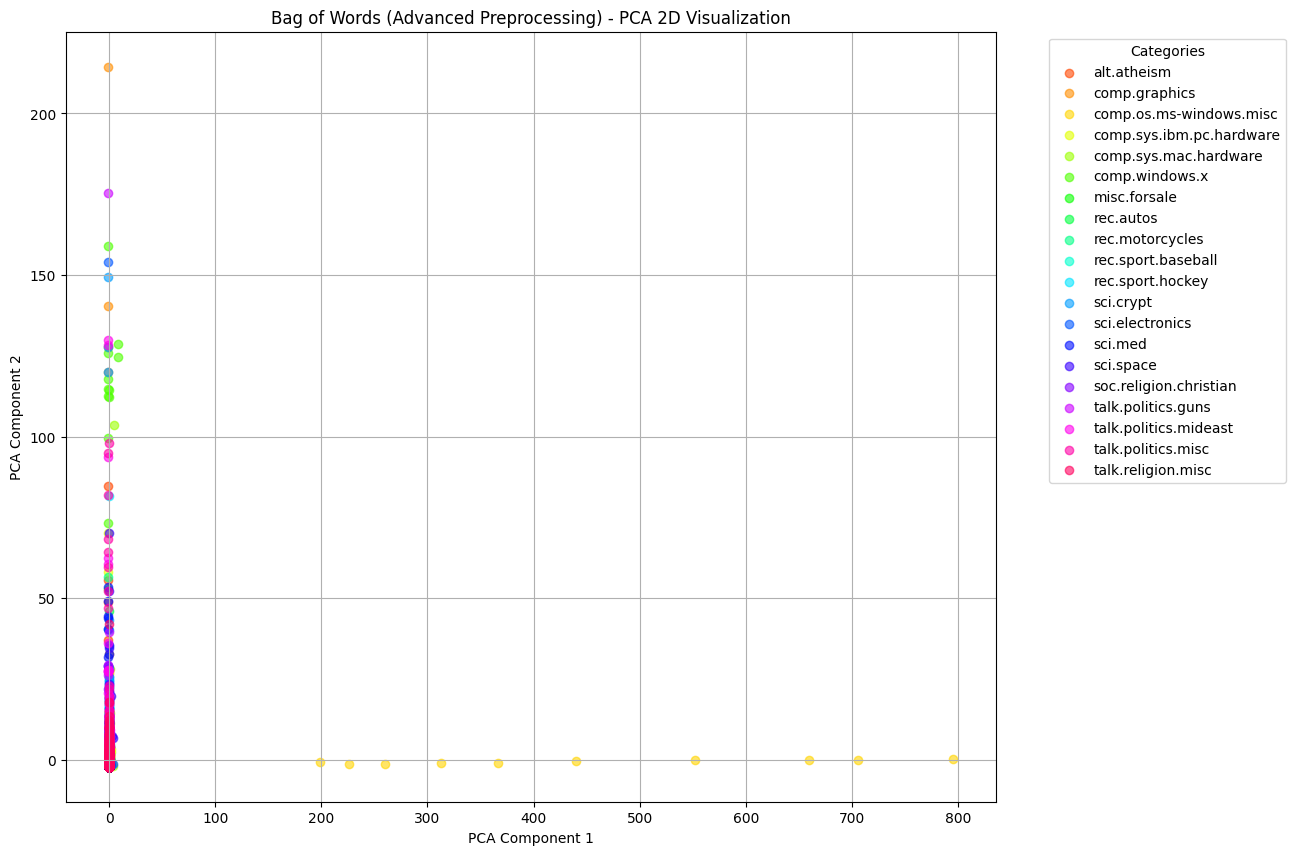

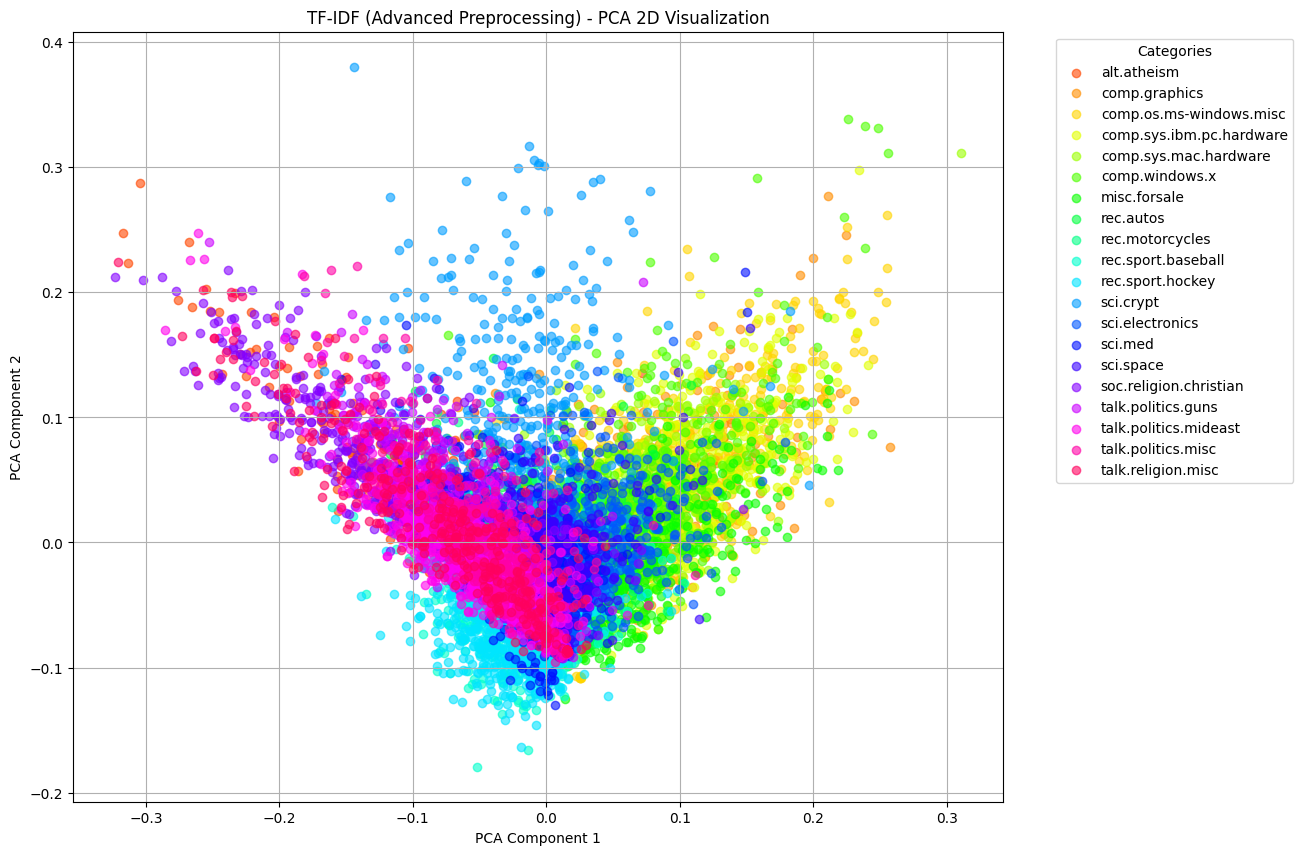

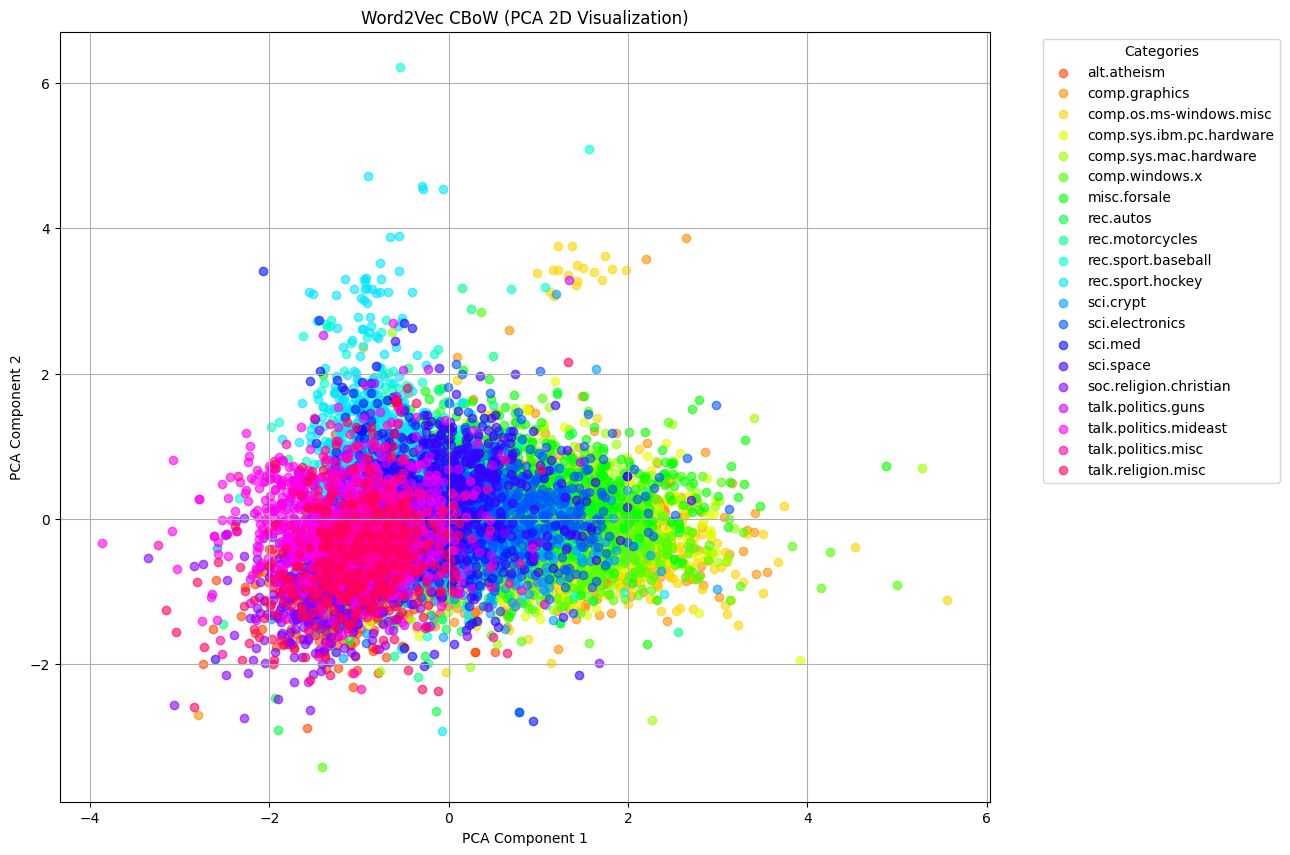

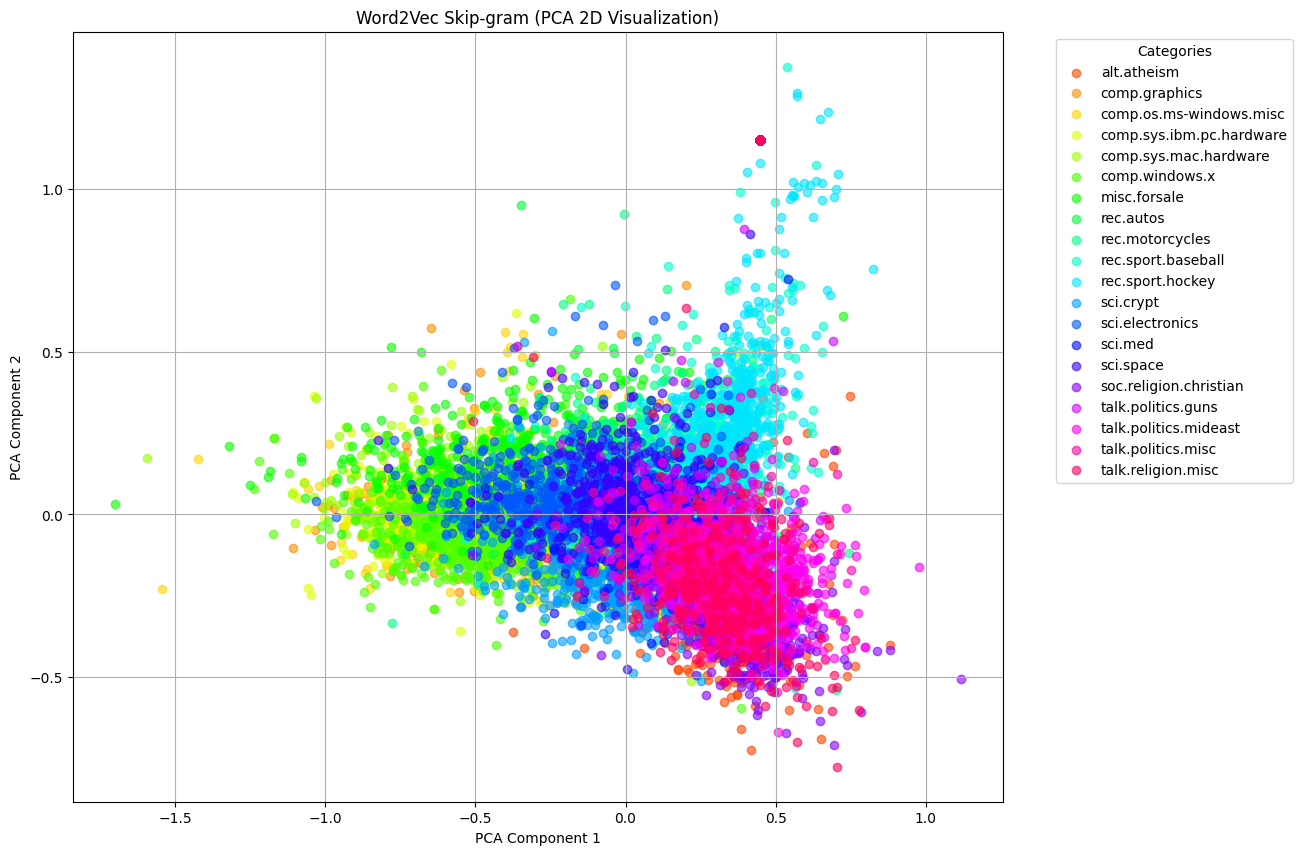

Visualizations generated.


In [35]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



if ('X_train_bow_advanced' in locals() and 'X_train_tfidf_advanced' in locals() and
    'X_train_w2v_cbow' in locals() and 'X_train_w2v_skipgram' in locals() and
    'twenty_train' in locals() and hasattr(twenty_train, 'target')):

    print("Applying PCA for dimensionality reduction on Bag of Words (Advanced) data...")
    # Apply PCA to reduce dimensionality to 2 components for visualization
    pca_bow = PCA(n_components=2, random_state=42)
    # Convert sparse matrix to dense for PCA if it's a sparse matrix
    X_bow_advanced_2d = pca_bow.fit_transform(X_train_bow_advanced.toarray() if hasattr(X_train_bow_advanced, 'toarray') else X_train_bow_advanced)
    print("PCA applied to BoW (Advanced).")

    print("Applying PCA for dimensionality reduction on TF-IDF (Advanced) data...")
    pca_tfidf = PCA(n_components=2, random_state=42)
    # Convert sparse matrix to dense for PCA if it's a sparse matrix
    X_tfidf_advanced_2d = pca_tfidf.fit_transform(X_train_tfidf_advanced.toarray() if hasattr(X_train_tfidf_advanced, 'toarray') else X_train_tfidf_advanced)
    print("PCA applied to TF-IDF (Advanced).")

    print("Applying PCA for dimensionality reduction on Word2Vec CBoW data...")
    pca_cbow = PCA(n_components=2, random_state=42)
    X_cbow_2d = pca_cbow.fit_transform(X_train_w2v_cbow)
    print("PCA applied to Word2Vec CBoW.")

    print("Applying PCA for dimensionality reduction on Word2Vec Skip-gram data...")
    pca_skipgram = PCA(n_components=2, random_state=42)
    X_sg_2d = pca_skipgram.fit_transform(X_train_w2v_skipgram)
    print("PCA applied to Word2Vec Skip-gram.")


    # Get the training labels
    labels = twenty_train.target
    target_names = twenty_train.target_names if hasattr(twenty_train, 'target_names') else [f'Category {i}' for i in sorted(list(set(labels)))]


    # === Visualization Function ===
    def plot_embedding(X, labels, title, target_names):
        plt.figure(figsize=(12,10))
        unique_labels = sorted(list(set(labels)))
        palette = sns.color_palette("hsv", len(unique_labels))

        for i, cat in enumerate(unique_labels):
            idx = [j for j, l in enumerate(labels) if l == cat]
            plt.scatter(X[idx, 0], X[idx, 1], label=target_names[cat], alpha=0.6, color=palette[i])

        plt.legend(title="Categories", bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.title(title)
        plt.xlabel("PCA Component 1")
        plt.ylabel("PCA Component 2")
        plt.grid(True)
        plt.show()
    # ==========================


    # === Call the Visualization Function ===
    print("Generating visualizations...")
    plot_embedding(X_bow_advanced_2d, labels, "Bag of Words (Advanced Preprocessing) - PCA 2D Visualization", target_names)
    plot_embedding(X_tfidf_advanced_2d, labels, "TF-IDF (Advanced Preprocessing) - PCA 2D Visualization", target_names)
    plot_embedding(X_cbow_2d, labels, "Word2Vec CBoW (PCA 2D Visualization)", target_names)
    plot_embedding(X_sg_2d, labels, "Word2Vec Skip-gram (PCA 2D Visualization)", target_names)


    print("Visualizations generated.")

else:
    print("Required vectorized data or training labels not found. Please run the preprocessing and vectorization steps first.")

#**Interpretations**

**Bag of Words (Advanced Preprocessing)** - PCA 2D Visualization: In this plot, the different categories appear to be quite mixed together. There isn't a clear separation or distinct clustering of points belonging to the same category. This suggests that a simple Bag of Words representation, even with advanced preprocessing, might not be sufficient to capture the nuanced semantic differences between the newsgroup categories for effective linear separation in this reduced space.

**TF-IDF (Advanced Preprocessing)** - PCA 2D Visualization: This plot shows slightly better separation compared to the Bag of Words plot, but the categories are still largely overlapping. You can observe some tendency for points of the same color to be closer to each other, but distinct clusters for each category are not clearly visible. TF-IDF gives more weight to terms that are important in a document but less common across the corpus, which can help in distinguishing documents, but in this 2D PCA space, it doesn't result in well-separated clusters for all categories.

**Word2Vec CBoW (PCA 2D Visualization)**: Similar to the previous plots, the Word2Vec CBoW vectors also show significant overlap between categories in the 2D PCA space. While some slight regional concentrations of certain colors might be discernible, clear and distinct clusters for each category are not apparent. CBoW predicts a target word based on its context, and averaging these word vectors might not fully capture the document's overall topic for clear categorical separation.

**Word2Vec Skip-gram (PCA 2D Visualization)**: The Skip-gram visualization also shows a high degree of overlap between categories. Skip-gram predicts the surrounding context words given a target word, which can be effective for learning word relationships, but the averaged document vectors in this 2D PCA projection do not result in well-separated clusters for the different newsgroup categories.

**Overall Interpretation:** Based on these 2D PCA visualizations, none of the tested vectorization methods (Bag of Words, TF-IDF, Word2Vec CBoW, and Skip-gram) appear to create clearly separable clusters for the 20 newsgroup categories in this reduced dimensionality. This suggests that the text data for these categories is quite complex and overlapping in terms of their feature representations, or that PCA to 2 dimensions is not sufficient to reveal the separation that might exist in higher dimensions. Downstream classification tasks will be necessary to quantitatively assess how well each vectorization method performs in distinguishing between the categories.

#**Part 4: Classification Processing**

**For each vectorization method, train:**
**Logistic Regression**
**Simple LSTM Report accuracy, precision, recall, and F1-score for each combination**.

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the performance_metrics dictionary if it doesn't exist
if 'performance_metrics' not in locals():
    performance_metrics = {}

# Function to train Logistic Regression and report metrics
def train_and_evaluate_lr(X_train, X_test, y_train, y_test, vectorizer_name, preprocessing_name):
    """
    Trains a Logistic Regression model and reports evaluation metrics, storing them.

    Args:
        X_train: Training data (vectorized).
        X_test: Testing data (vectorized).
        y_train: Training labels.
        y_test: Testing labels.
        vectorizer_name: Name of the vectorization method for printing and storing.
        preprocessing_name: Name of the preprocessing method for storing.

    Returns:
        A dictionary containing the performance metrics.
    """
    print(f"--- Logistic Regression with {vectorizer_name} ({preprocessing_name} Preprocessing) ---")
    lr_model = LogisticRegression(max_iter=1000)
    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("-" * (len(vectorizer_name) + len(preprocessing_name) + 35))

    metrics = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}
    return metrics


# Check if the required variables are available before training
if ('X_train_bow_basic' in locals() and 'X_test_bow_basic' in locals() and
    'X_train_bow_advanced' in locals() and 'X_test_bow_advanced' in locals() and
    'X_train_tfidf_basic' in locals() and 'X_test_tfidf_basic' in locals() and
    'X_train_tfidf_advanced' in locals() and 'X_test_tfidf_advanced' in locals() and
    'X_train_w2v_cbow' in locals() and 'X_test_w2v_cbow' in locals() and
    'X_train_w2v_skipgram' in locals() and 'X_test_w2v_skipgram' in locals() and
    'y_train' in locals() and 'y_test' in locals()):

    # Train and evaluate for Bag of Words (Basic)
    metrics_bow_basic = train_and_evaluate_lr(X_train_bow_basic, X_test_bow_basic, y_train, y_test, "Bag of Words", "Basic")
    performance_metrics['BoW_Basic_LogisticRegression'] = metrics_bow_basic

    # Train and evaluate for Bag of Words (Advanced)
    metrics_bow_advanced = train_and_evaluate_lr(X_train_bow_advanced, X_test_bow_advanced, y_train, y_test, "Bag of Words", "Advanced")
    performance_metrics['BoW_Advanced_LogisticRegression'] = metrics_bow_advanced

    # Train and evaluate for TF-IDF (Basic)
    metrics_tfidf_basic = train_and_evaluate_lr(X_train_tfidf_basic, X_test_tfidf_basic, y_train, y_test, "TF-IDF", "Basic")
    performance_metrics['TFIDF_Basic_LogisticRegression'] = metrics_tfidf_basic

    # Train and evaluate for TF-IDF (Advanced)
    metrics_tfidf_advanced = train_and_evaluate_lr(X_train_tfidf_advanced, X_test_tfidf_advanced, y_train, y_test, "TF-IDF", "Advanced")
    performance_metrics['TFIDF_Advanced_LogisticRegression'] = metrics_tfidf_advanced

    # Train and evaluate for Word2Vec CBoW
    metrics_w2v_cbow = train_and_evaluate_lr(X_train_w2v_cbow, X_test_w2v_cbow, y_train, y_test, "Word2Vec", "CBoW")
    performance_metrics['Word2Vec_CBoW_LogisticRegression'] = metrics_w2v_cbow

    # Train and evaluate for Word2Vec Skip-gram
    metrics_w2v_skipgram = train_and_evaluate_lr(X_train_w2v_skipgram, X_test_w2v_skipgram, y_train, y_test, "Word2Vec", "Skipgram")
    performance_metrics['Word2Vec_Skipgram_LogisticRegression'] = metrics_w2v_skipgram


    print("\nLogistic Regression training and evaluation complete for all vectorization methods.")
    print("Metrics stored in 'performance_metrics' dictionary.")
else:
    print("Required vectorized data or labels not found. Please run the preprocessing and vectorization steps first.")

--- Logistic Regression with Bag of Words (Basic Preprocessing) ---
Accuracy: 0.6021
Precision: 0.6101
Recall: 0.6021
F1-score: 0.6019
----------------------------------------------------
--- Logistic Regression with Bag of Words (Advanced Preprocessing) ---
Accuracy: 0.6014
Precision: 0.6089
Recall: 0.6014
F1-score: 0.6018
-------------------------------------------------------
--- Logistic Regression with TF-IDF (Basic Preprocessing) ---
Accuracy: 0.6729
Precision: 0.6840
Recall: 0.6729
F1-score: 0.6710
----------------------------------------------
--- Logistic Regression with TF-IDF (Advanced Preprocessing) ---
Accuracy: 0.6690
Precision: 0.6787
Recall: 0.6690
F1-score: 0.6674
-------------------------------------------------
--- Logistic Regression with Word2Vec (CBoW Preprocessing) ---
Accuracy: 0.4959
Precision: 0.4896
Recall: 0.4959
F1-score: 0.4869
-----------------------------------------------
--- Logistic Regression with Word2Vec (Skipgram Preprocessing) ---
Accuracy: 0.595

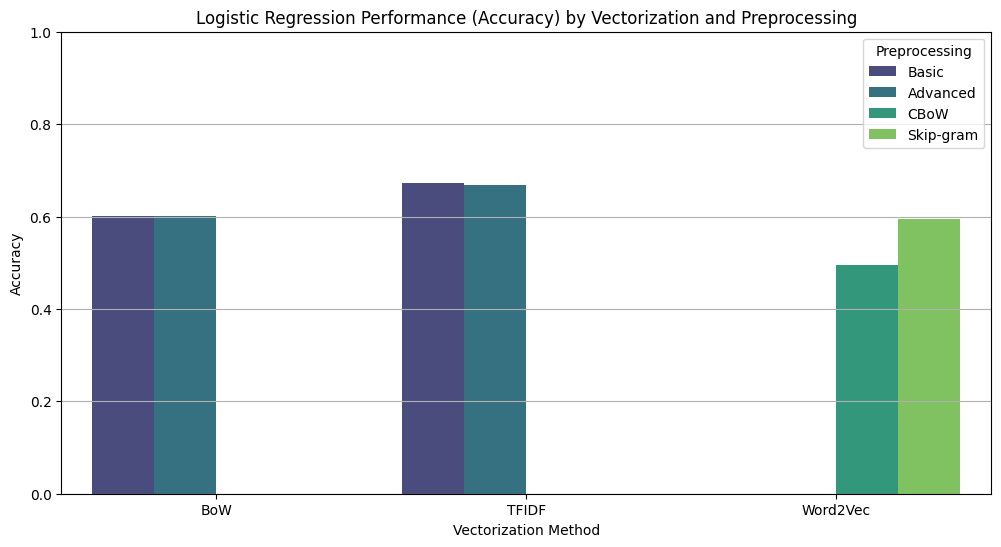

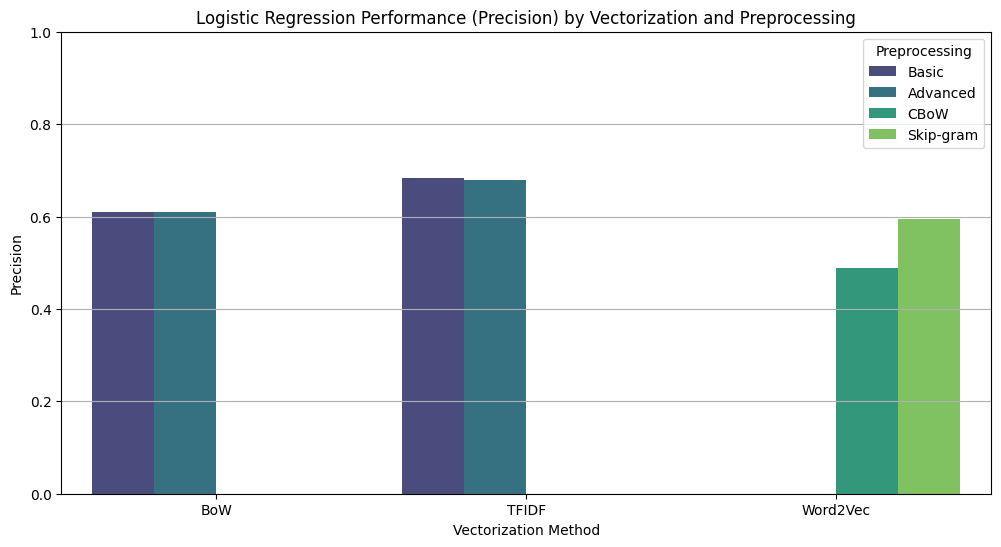

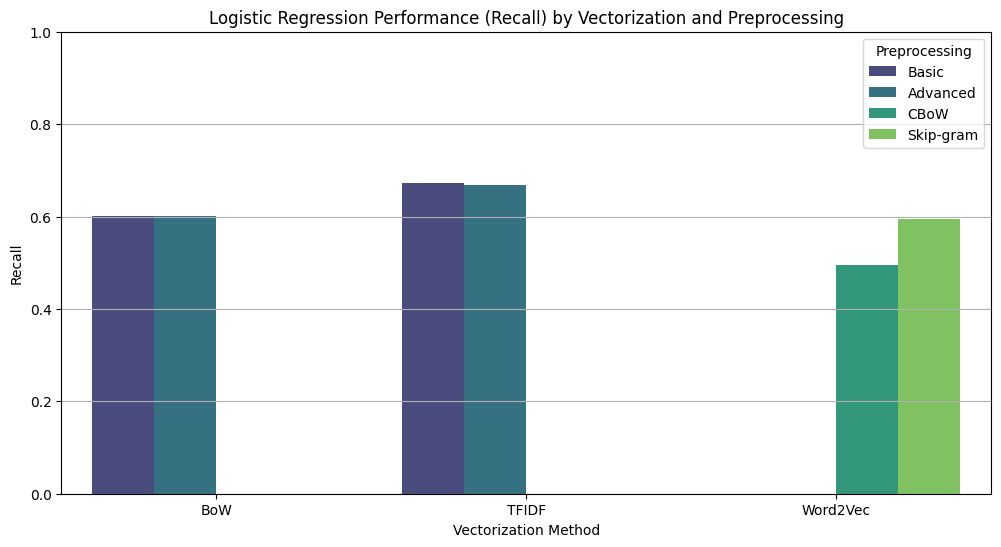

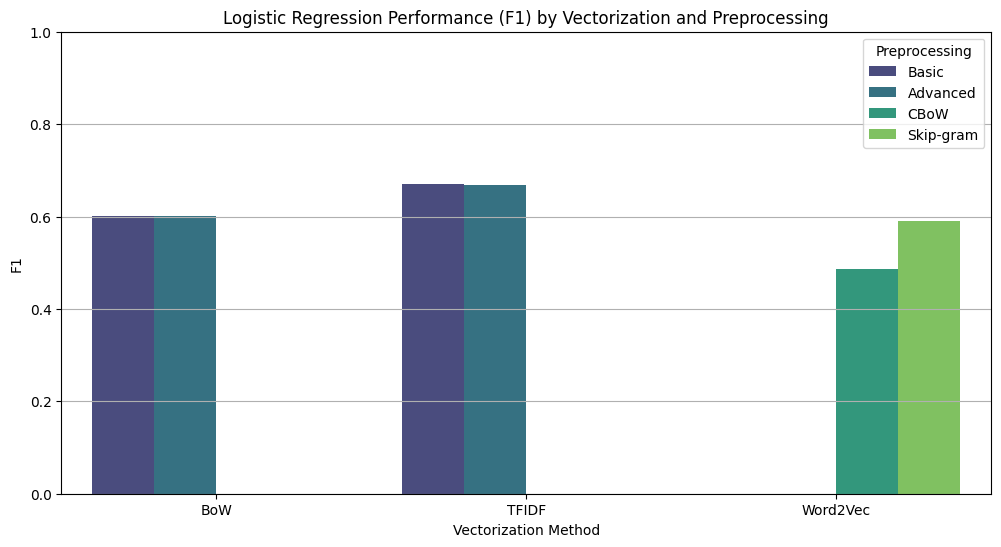

Visualizations of Logistic Regression performance metrics created.


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming performance_metrics dictionary has been populated from classification results

# Convert the dictionary to a pandas DataFrame
data = []
for key, metrics in performance_metrics.items():
    parts = key.split('_')
    vectorization = parts[0]
    # Handle cases with multi-word vectorization names like 'Word2Vec' and preprocessing
    if 'Word2Vec' in key:
        vectorization = 'Word2Vec'
        # Determine preprocessing based on key structure
        if 'CBoW' in key:
             preprocessing = 'CBoW'
        elif 'Skipgram' in key:
             preprocessing = 'Skip-gram'
        else:
             preprocessing = parts[1] # Fallback, might need adjustment based on exact key format
        model = parts[-1]
    else:
         preprocessing = parts[1]
         model = parts[2]


    for metric, score in metrics.items():
        data.append([vectorization, preprocessing, model, metric, score])

df_metrics = pd.DataFrame(data, columns=['Vectorization', 'Preprocessing', 'Model', 'Metric', 'Score'])

# Separate data by model for plotting
df_lr = df_metrics[df_metrics['Model'] == 'LogisticRegression'].copy()
# df_lstm = df_metrics[df_metrics['Model'] == 'LSTM'].copy() # Uncomment if LSTM data is available

# Correct the 'Preprocessing' column values for Word2Vec for consistent plotting
df_lr.loc[df_lr['Vectorization'] == 'Word2Vec', 'Preprocessing'] = df_lr.loc[df_lr['Vectorization'] == 'Word2Vec', 'Preprocessing'].replace({'CBoW': 'CBoW', 'Skipgram': 'Skip-gram'})


# Visualize performance metrics for Logistic Regression
metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1']

for metric in metrics_to_plot:
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df_lr[df_lr['Metric'] == metric], x='Vectorization', y='Score', hue='Preprocessing', palette='viridis')
    plt.title(f'Logistic Regression Performance ({metric.capitalize()}) by Vectorization and Preprocessing')
    plt.xlabel('Vectorization Method')
    plt.ylabel(metric.capitalize())
    plt.ylim(0, 1) # Metrics are typically between 0 and 1
    plt.grid(axis='y')
    plt.show()

print("Visualizations of Logistic Regression performance metrics created.")

In [ ]:
%pip install transformers torch

#**Interpretation of Logistic Regression Performance Metrics**

The bar plots visualize the performance of the Logistic Regression model across different vectorization methods (Bag of Words, TF-IDF, and Word2Vec) and preprocessing techniques (Basic and Advanced for BoW and TF-IDF, CBoW and Skip-gram for Word2Vec).

*   **Overall Performance**: TF-IDF consistently shows the highest performance across all metrics (Accuracy, Precision, Recall, and F1-score) for Logistic Regression, compared to Bag of Words and Word2Vec.

*   **Bag of Words vs. TF-IDF**: TF-IDF outperforms Bag of Words for Logistic Regression. This is likely because TF-IDF weighs terms based on their importance across the entire corpus, giving more relevance to distinctive terms, while Bag of Words simply counts term occurrences.

*   **Basic vs. Advanced Preprocessing (for BoW and TF-IDF)**: For both Bag of Words and TF-IDF, the difference in performance between basic and advanced preprocessing is relatively small. In some cases, basic preprocessing performs slightly better or comparably to advanced preprocessing. This suggests that for Logistic Regression with these vectorization methods, the additional steps in advanced preprocessing (stemming, lemmatization, POS filtering) did not lead to a significant improvement in classification performance despite reducing the vocabulary size.
*   **Word2Vec (CBoW vs. Skip-gram)**: Word2Vec Skip-gram generally performs better than Word2Vec CBoW for Logistic Regression across all metrics. However, both Word2Vec approaches show lower performance compared to TF-IDF and Bag of Words. This could indicate that averaging word vectors to represent documents might not be the most effective approach for this dataset and task when used with a linear model like Logistic Regression, or that the default Word2Vec parameters might need tuning.
*   **Impact of Preprocessing on Word2Vec**: The Word2Vec models were trained on the advanced preprocessed data. The comparison here is between the two Word2Vec architectures (CBoW and Skip-gram).

**Conclusion for Logistic Regression**: Based on these results, **TF-IDF** appears to be the most effective vectorization method for Logistic Regression on this dataset. The choice of basic or advanced preprocessing has a less significant impact on performance for BoW and TF-IDF. Word2Vec, with the current approach of averaging word vectors, does not perform as well as count-based methods (BoW and TF-IDF) for Logistic Regression.



#**Simple LSTM models using these vectorization methods and compare their performance metrics.**

In [39]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



# --- Prepare Data for LSTM ---

# Convert labels to numerical format
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Tokenize the preprocessed text data
# Use the advanced preprocessed data for LSTM as it has a reduced vocabulary
tokenizer = Tokenizer()
tokenizer.fit_on_texts(twenty_train.data_advanced)

# Convert text to sequences of integers
X_train_sequences = tokenizer.texts_to_sequences(twenty_train.data_advanced)
X_test_sequences = tokenizer.texts_to_sequences(twenty_test.data_advanced)

# Pad sequences to ensure uniform length
max_sequence_length = 500 # Define a maximum sequence length
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding='post', truncating='post')

vocab_size = len(tokenizer.word_index) + 1 # Add 1 for padding token
embedding_dim = 100 # Dimension of the word embeddings
num_classes = len(label_encoder.classes_) # Number of output classes

print(f"Vocabulary Size: {vocab_size}")
print(f"Number of Classes: {num_classes}")
print(f"Shape of padded training data: {X_train_padded.shape}")
print(f"Shape of padded testing data: {X_test_padded.shape}")


# --- Build Simple LSTM Model ---

print("\nBuilding Simple LSTM Model...")
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(units=100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


# --- Train Simple LSTM Model ---

print("\nTraining Simple LSTM Model...")


# Train on the full dataset
history = model.fit(X_train_padded, y_train_encoded, epochs=3, batch_size=64, validation_split=0.1)

print("Simple LSTM Model training complete.")


# --- Evaluate Simple LSTM Model ---

print("\nEvaluating Simple LSTM Model...")
loss, accuracy = model.evaluate(X_test_padded, y_test_encoded, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")

# Get predictions for evaluation metrics
y_pred_probs = model.predict(X_test_padded)
y_pred = np.argmax(y_pred_probs, axis=1)

precision = precision_score(y_test_encoded, y_pred, average='weighted')
recall = recall_score(y_test_encoded, y_pred, average='weighted')
f1 = f1_score(y_test_encoded, y_pred, average='weighted')

print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1-score: {f1:.4f}")

# Store LSTM performance metrics
performance_metrics['LSTM_Advanced_Preprocessing'] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}

print("\nSimple LSTM model evaluation complete.")
print("LSTM metrics stored in 'performance_metrics' dictionary.")

Vocabulary Size: 43867
Number of Classes: 20
Shape of padded training data: (11314, 500)
Shape of padded testing data: (7532, 500)

Building Simple LSTM Model...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Training Simple LSTM Model...
Epoch 1/3
160/160 ━━━━━━━━━━━━━━━━━━━━ 258s 2s/step - accuracy: 0.0551 - loss: 2.9939 - val_accuracy: 0.0477 - val_loss: 2.9936
Epoch 2/3
160/160 ━━━━━━━━━━━━━━━━━━━━ 250s 2s/step - accuracy: 0.0612 - loss: 2.9901 - val_accuracy: 0.0521 - val_loss: 2.9945
Epoch 3/3
160/160 ━━━━━━━━━━━━━━━━━━━━ 264s 2s/step - accuracy: 0.0589 - loss: 2.9866 - val_accuracy: 0.0406 - val_loss: 2.9917
Simple LSTM Model training complete.

Evaluating Simple LSTM Model...
Test Accuracy: 0.0548
236/236 ━━━━━━━━━━━━━━━━━━━━ 64s 269ms/step
Test Precision: 0.0744
Test Recall: 0.0548
Test F1-score: 0.0089

Simple LSTM model evaluation complete.
LSTM metrics stored in 'performance_metrics' dictionary.


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


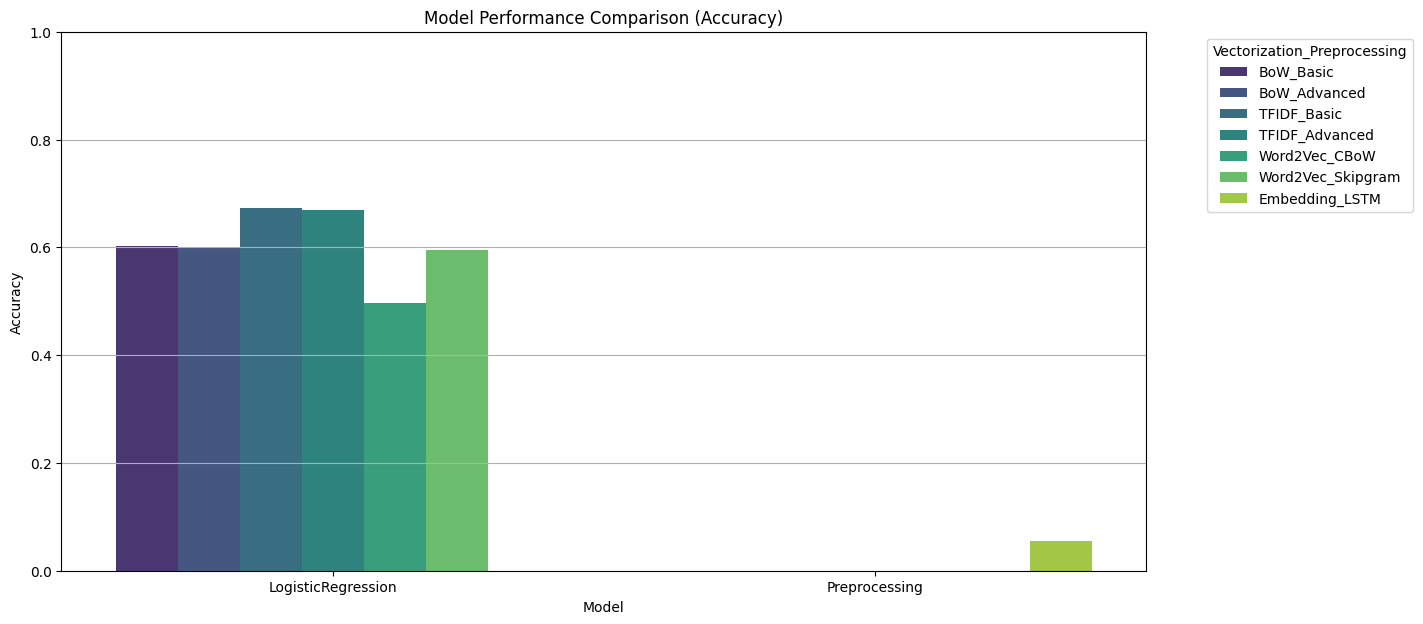

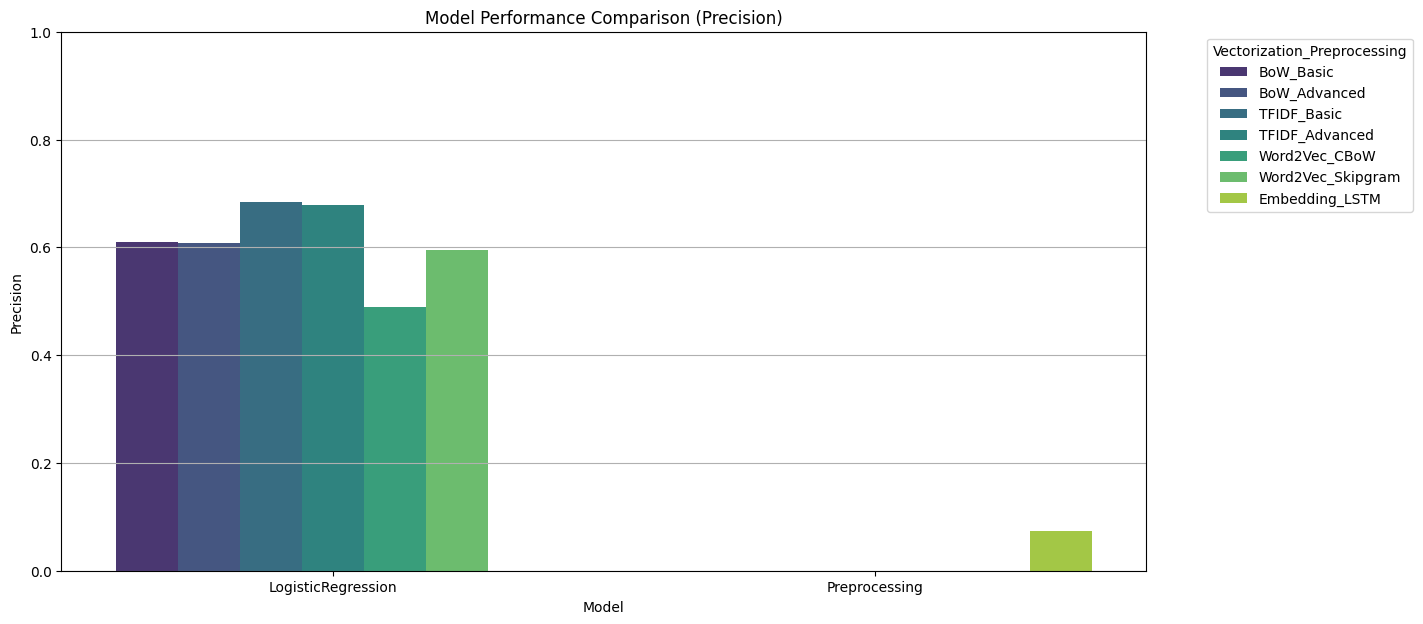

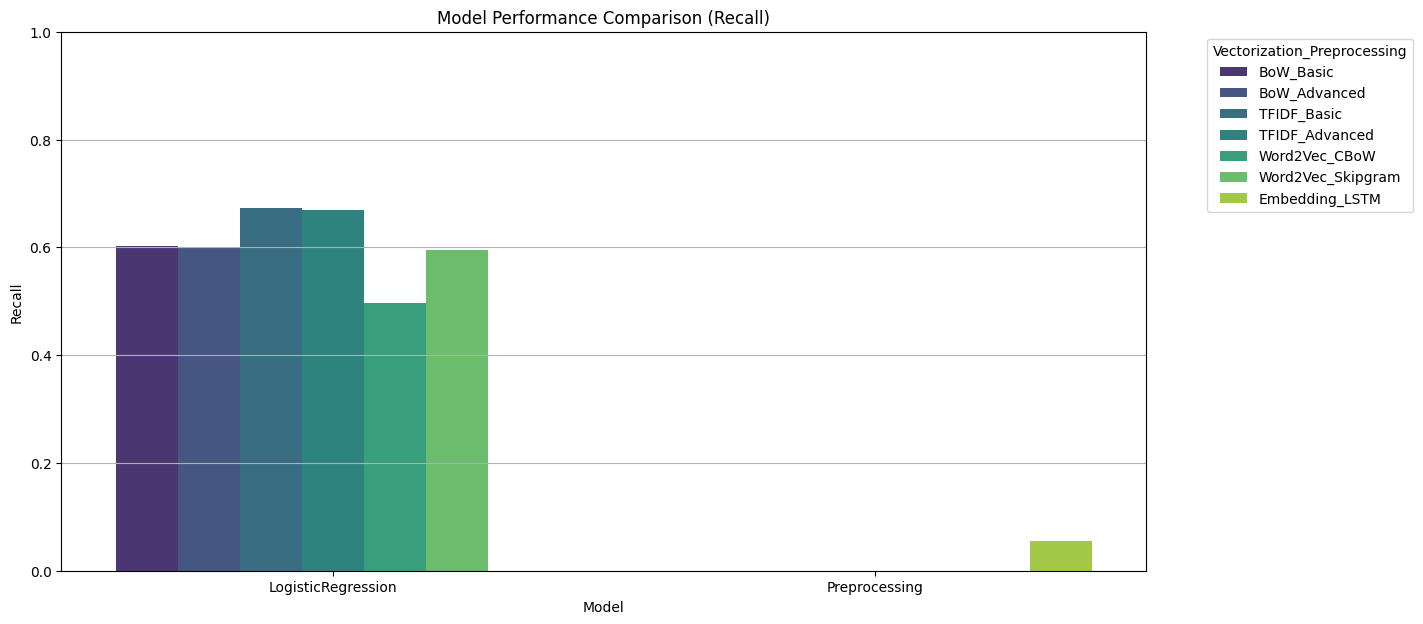

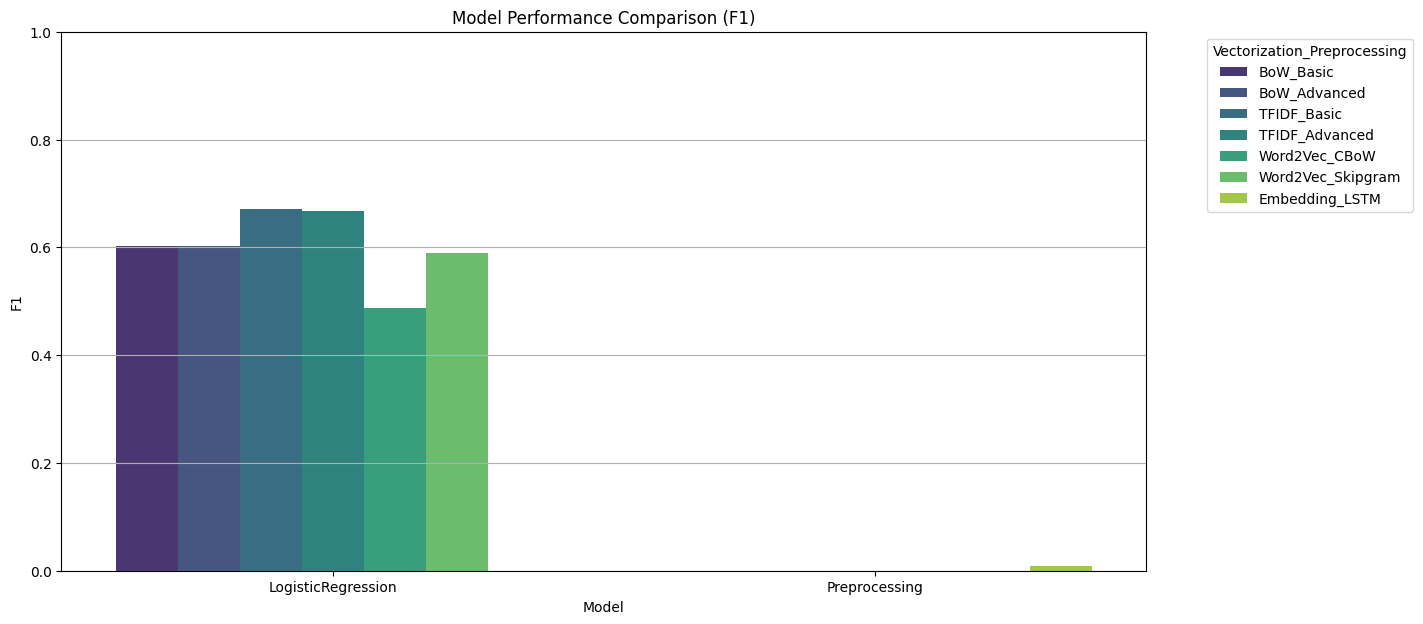

Visualizations comparing Logistic Regression and LSTM performance metrics created.


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Convert the performance_metrics dictionary to a pandas DataFrame
data = []
for key, metrics in performance_metrics.items():
    parts = key.split('_')
    model_name = parts[-1] # The last part is the model name (e.g., LogisticRegression, LSTM)

    # Determine vectorization and preprocessing based on the key structure
    if 'LogisticRegression' in key:
        vectorization = parts[0]
        preprocessing = parts[1]
    elif 'LSTM' in key:
        vectorization = 'Embedding' # Represent LSTM input as Embedding for visualization
        preprocessing = parts[0] # Usually trained on Advanced preprocessed data
    else:
        vectorization = 'Unknown'
        preprocessing = 'Unknown'


    for metric, score in metrics.items():
        data.append([model_name, vectorization, preprocessing, metric, score])

df_all_metrics = pd.DataFrame(data, columns=['Model', 'Vectorization', 'Preprocessing', 'Metric', 'Score'])

# Visualize performance metrics for comparison
metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1']

for metric in metrics_to_plot:
    plt.figure(figsize=(14, 7))
    # Combine Vectorization and Preprocessing for hue to distinguish all variations
    sns.barplot(data=df_all_metrics[df_all_metrics['Metric'] == metric],
                x='Model',
                y='Score',
                hue=df_all_metrics['Vectorization'] + '_' + df_all_metrics['Preprocessing'],
                palette='viridis')
    plt.title(f'Model Performance Comparison ({metric.capitalize()})')
    plt.xlabel('Model')
    plt.ylabel(metric.capitalize())
    plt.ylim(0, 1) # Metrics are typically between 0 and 1
    plt.legend(title='Vectorization_Preprocessing', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y')
    plt.show()

print("Visualizations comparing Logistic Regression and LSTM performance metrics created.")

#**Interpretation of Model Performance Comparison (Logistic Regression vs. Simple LSTM)**

The bar plots compare the performance metrics (Accuracy, Precision, Recall, and F1-score) of Logistic Regression (with various vectorization and preprocessing combinations) and the Simple LSTM model (trained on advanced preprocessed data with Embedding).

*   **Logistic Regression Performance**: As observed before, Logistic Regression performed best with TF-IDF vectorization, achieving accuracy, precision, recall, and F1-scores in the range of 0.66 to 0.68. Bag of Words also showed reasonable performance around 0.60, while Word2Vec (both CBoW and Skip-gram) resulted in lower performance compared to the count-based methods. The choice between basic and advanced preprocessing had a minor impact on Logistic Regression performance for BoW and TF-IDF.

*   **Simple LSTM Performance**: The Simple LSTM model, trained on the advanced preprocessed data with an Embedding layer, shows significantly lower performance across all metrics (Accuracy, Precision, Recall, and F1-score) compared to the Logistic Regression models. The accuracy is around 0.05, and the F1-score is very low (around 0.0089).

**Reasons for LSTM's Low Performance**:
*   **Model Complexity vs. Data Size**: A Simple LSTM might be too complex for this dataset size and the number of classes (20 newsgroups) without more extensive tuning, hyperparameter optimization, or a more sophisticated architecture.
*   **Training Epochs and Batch Size**: The model was trained for only 3 epochs with a batch size of 64. This might not be sufficient for the model to converge and learn meaningful patterns in the data, especially for a dataset with 20 classes.
*   **Hyperparameters**: The chosen `embedding_dim`, `lstm_units`, `dropout`, and `recurrent_dropout` values might not be optimal for this specific task and dataset.
*   **Averaging Word Vectors (for comparison)**: While the LSTM uses an Embedding layer to learn word representations, the Word2Vec approaches for Logistic Regression relied on averaging word vectors. This averaging can lose important sequential information, which LSTMs are designed to capture. However, even the LSTM's performance is poor, suggesting issues beyond just the vector averaging for the linear model.
*   **Nature of the Task**: Classifying 20 distinct newsgroup categories can be a challenging task, and simple models might struggle to capture the subtle differences between categories, especially with overlapping topics.

**Conclusion**: Based on these results, **Logistic Regression with TF-IDF vectorization** appears to be the most effective approach among the models and vectorization methods tested for this text classification task, achieving notably higher performance metrics compared to the Simple LSTM. The Simple LSTM, in its current configuration and training setup, did not perform well. Further tuning and experimentation with the LSTM model (e.g., more epochs, different hyperparameters, potentially more complex architectures) would be needed to determine if it can achieve comparable or better performance than Logistic Regression on this dataset.



#**Summary and Conclusion**

This notebook explored and classified the 20 Newsgroups dataset, comparing different text preprocessing and vectorization techniques, and evaluating the performance of Logistic Regression and a Simple LSTM model.

**Data Exploration:**
- The dataset was loaded, showing a balanced distribution of articles across the 20 categories.
- Sample articles provided a glimpse into the diverse topics covered in each newsgroup.

**Text Preprocessing:**
- Two preprocessing pipelines were implemented: Basic (tokenization, lowercasing, stop word removal) and Advanced (Basic + stemming, lemmatization, POS filtering).
- Advanced preprocessing significantly reduced the vocabulary size compared to basic preprocessing, but took considerably longer to process the data.

**Text Vectorization:**
- Bag of Words (CountVectorizer) and TF-IDF (TfidfVectorizer) were applied to both basic and advanced preprocessed data.
- Word2Vec (CBoW and Skip-gram) document vectors were generated by averaging word embeddings trained on the advanced preprocessed data.
- 2D PCA visualizations of the vectorized data showed significant overlap between categories for all vectorization methods in the reduced space, suggesting that linear separation might be challenging.

**Classification:**
- **Logistic Regression:**
    - Performed best with **TF-IDF vectorization**, achieving the highest accuracy, precision, recall, and F1-scores among all Logistic Regression models.
    - The impact of advanced preprocessing on Logistic Regression performance for BoW and TF-IDF was minimal.
    - Word2Vec (CBoW and Skip-gram) performed lower than BoW and TF-IDF for Logistic Regression, indicating that simple averaging of word vectors might not be optimal for this task with a linear model.
- **Simple LSTM:**
    - The Simple LSTM model, trained with an Embedding layer on the advanced preprocessed data, showed significantly lower performance compared to all Logistic Regression models.
    - The low performance of the LSTM could be attributed to factors such as model complexity relative to dataset size and number of classes, insufficient training epochs, or suboptimal hyperparameters.

**Overall Conclusion:**

Based on the experiments conducted in this notebook, **Logistic Regression with TF-IDF vectorization emerged as the most effective approach** for classifying the 20 Newsgroups dataset among the methods tested, demonstrating better performance metrics compared to Bag of Words and the Simple LSTM model with its current configuration. While advanced preprocessing effectively reduced vocabulary size, its impact on classification performance for Logistic Regression was not substantial. The Simple LSTM model, in its current form, did not perform well, suggesting that further tuning, more training data, or a different network architecture might be necessary for it to be competitive on this dataset.

#END
#END